In [41]:
import numpy as np
import matplotlib.pyplot as plt     #importing e v e r y t h i n g
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as st
import scipy.special as sp
import csv
import math
import pandas as pd
import sklearn.metrics as met
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from copy import deepcopy
import re

In [106]:
# i tried reading the csv in a bad way

Error: line contains NUL

In [5]:
df = pd.read_csv('../data/blogtext.csv')  #read it in a good way
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [6]:
df.date = pd.to_datetime(df.date , infer_datetime_format = True, errors = 'coerce')

In [7]:
df.dtypes

id                 int64
gender            object
age                int64
topic             object
sign              object
date      datetime64[ns]
text              object
dtype: object

In [8]:
df.describe(include = 'O').transpose()

,count,unique,top,freq
gender,681284,2,male,345193
topic,681284,40,indUnk,251015
sign,681284,12,Cancer,65048
text,681284,611652,urlLink,445


In [9]:
df.describe(exclude = 'O').transpose()

<ipython-input-9-06429e832fe1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude = 'O').transpose()


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
id,681284,NaN,NaT,NaN,NaT,NaT,2.3978e+06,1.24772e+06,5114,1.23961e+06,2.60758e+06,3.52566e+06,4.33765e+06
age,681284,NaN,NaT,NaN,NaT,NaT,23.9323,7.78601,13,17,24,26,48
date,673538,1736,2004-08-02,16546,1999-01-01,2006-08-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='date'>

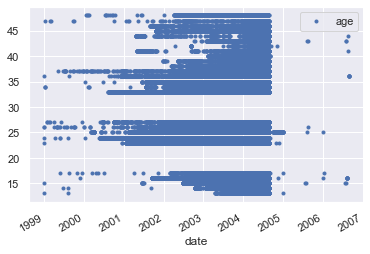

In [10]:
df.plot(x = 'date', y ='age', style = '.' )

In [13]:
df.shape

(681284, 7)

In [14]:
df.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [15]:
dg = df[['gender','age','date']]

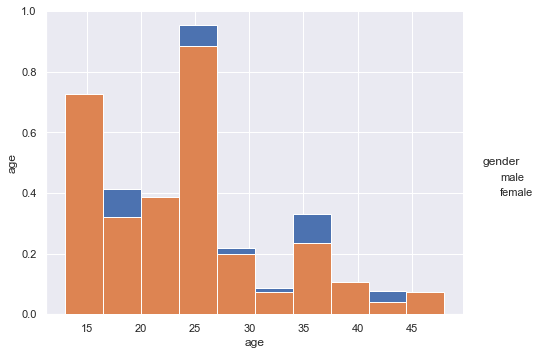

In [23]:

g = sns.PairGrid(dg, hue="gender",height=5,aspect=12/9)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

In [24]:
zod_counts = dict()

for

In [29]:
type(dz)

pandas.core.frame.DataFrame

In [34]:
dz.value_counts()

sign       
Cancer         65048
Aries          64979
Taurus         62561
Libra          62363
Virgo          60399
Scorpio        57161
Pisces         54053
Leo            53811
Gemini         51985
Sagittarius    50036
Aquarius       49687
Capricorn      49201
dtype: int64

In [35]:
dz.value_counts(normalize=True)

sign       
Cancer         0.095479
Aries          0.095377
Taurus         0.091828
Libra          0.091537
Virgo          0.088655
Scorpio        0.083902
Pisces         0.079340
Leo            0.078985
Gemini         0.076304
Sagittarius    0.073444
Aquarius       0.072931
Capricorn      0.072218
dtype: float64

<AxesSubplot:>

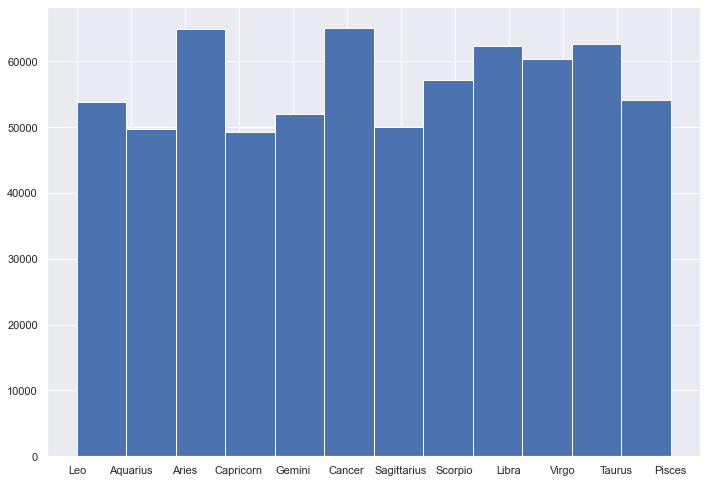

In [37]:
df['sign'].hist(bins=12)

In [38]:
#cleaning up the data
df.drop(['id','gender','age','topic','date'], axis=1, inplace=True)

In [39]:
df.head(10)

,sign,text
0,Leo,"Info has been found (+/- 100 pages,..."
1,Leo,These are the team members: Drewe...
2,Leo,In het kader van kernfusie op aarde...
3,Leo,testing!!! testing!!!
4,Aquarius,Thanks to Yahoo!'s Toolbar I can ...
5,Aquarius,I had an interesting conversation...
6,Aquarius,Somehow Coca-Cola has a way of su...
7,Aquarius,"If anything, Korea is a country o..."
8,Aquarius,Take a read of this news article ...
9,Aquarius,I surf the English news sites a l...


In [42]:
df['clean_text']=df['text'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x))

In [43]:
df['clean_text']=df['clean_text'].apply(lambda x: x.lower())

In [44]:
df['clean_text']=df['clean_text'].apply(lambda x: x.strip())

In [126]:
word_counts = dict()

count = 0

ddf = df.head(200000)

for post in ddf['clean_text']:
    for word in post.split():
        cur = ddf['sign'][count] + '-' + word
        if cur in word_counts:
            word_counts[cur] += 1
        else:
            word_counts[cur] = 1
    count += 1

In [127]:
word_counts

{'Leo-info': 150,
 'Leo-has': 6599,
 'Leo-been': 6454,
 'Leo-found': 1546,
 'Leo-pages': 197,
 'Leo-and': 85720,
 'Leo-mb': 36,
 'Leo-of': 60407,
 'Leo-pdf': 20,
 'Leo-files': 110,
 'Leo-now': 9043,
 'Leo-i': 135363,
 'Leo-have': 21860,
 'Leo-to': 96036,
 'Leo-wait': 1046,
 'Leo-untill': 38,
 'Leo-our': 5285,
 'Leo-team': 647,
 'Leo-leader': 148,
 'Leo-processed': 24,
 'Leo-it': 50100,
 'Leo-learns': 10,
 'Leo-html': 160,
 'Leo-these': 2898,
 'Leo-are': 13851,
 'Leo-the': 129674,
 'Leo-members': 258,
 'Leo-drewes': 1,
 'Leo-van': 193,
 'Leo-der': 30,
 'Leo-laag': 1,
 'Leo-urllink': 11232,
 'Leo-mail': 474,
 'Leo-ruiyu': 1,
 'Leo-xie': 4,
 'Leo-bryan': 35,
 'Leo-aaldering': 1,
 'Leo-me': 22642,
 'Leo-in': 42798,
 'Leo-het': 68,
 'Leo-kader': 4,
 'Leo-kernfusie': 1,
 'Leo-op': 66,
 'Leo-aarde': 2,
 'Leo-maak': 1,
 'Leo-je': 72,
 'Leo-eigen': 4,
 'Leo-waterstofbom': 1,
 'Leo-how': 6837,
 'Leo-build': 205,
 'Leo-an': 7657,
 'Leo-h': 1084,
 'Leo-bomb': 178,
 'Leo-from': 10716,
 'Leo-ascott'

In [128]:
vocab = dict()

for post in ddf['clean_text']:
    for word in post.split():
        if not word in vocab:
            vocab[word] = 1
            
vocab = vocab.keys()

In [129]:
vocab

dict_keys(['info', 'has', 'been', 'found', 'pages', 'and', 'mb', 'of', 'pdf', 'files', 'now', 'i', 'have', 'to', 'wait', 'untill', 'our', 'team', 'leader', 'processed', 'it', 'learns', 'html', 'these', 'are', 'the', 'members', 'drewes', 'van', 'der', 'laag', 'urllink', 'mail', 'ruiyu', 'xie', 'bryan', 'aaldering', 'me', 'in', 'het', 'kader', 'kernfusie', 'op', 'aarde', 'maak', 'je', 'eigen', 'waterstofbom', 'how', 'build', 'an', 'h', 'bomb', 'from', 'ascott', 'tartarus', 'uwa', 'edu', 'au', 'andrew', 'scott', 'newsgroups', 'rec', 'humor', 'subject', 'humorous', 'date', 'feb', 'gmt', 'organization', 'university', 'western', 'australia', 'original', 'file', 'dated', 'th', 'november', 'seemed', 'be', 'a', 'transcript', 'seven', 'days', 'article', 'poorly', 'formatted', 'corrupted', 'added', 'text', 'between', 'examine', 'under', 'microscope', 'malleable', 'like', 'gold', 'as', 'was', 'missing', 'if', 'anyone', 'full', 'please', 'distribute', 'am', 'not', 'responsible', 'for', 'accuracy', 

In [130]:
zods = ['Leo','Aquarius','Aries','Capricorn','Gemini','Cancer','Sagittarius','Scorpio','Libra','Virgo','Taurus','Pisces']
word_ratios = dict()

for word in vocab:
    sum = 0
    for sign in zods:
        if (sign + '-' + word) in word_counts:
            sum += word_counts[sign + '-' + word]
    if sum >= 2000:
        for sign in zods:
            if (sign + '-' + word) in word_counts:
                word_ratios[sign + '-' + word] = word_counts[sign + '-' + word] / sum
            else:
                word_ratios[sign + '-' + word] = 0
    else:
        for sign in zods:
            word_ratios[sign + '-' + word] = 0
    

In [131]:
word_ratios['Aquarius-if']

0.09203920631125986

In [132]:
word_ratios

{'Leo-info': 0.0962772785622593,
 'Aquarius-info': 0.08536585365853659,
 'Aries-info': 0.11296534017971759,
 'Capricorn-info': 0.08023106546854943,
 'Gemini-info': 0.06418485237483953,
 'Cancer-info': 0.09691912708600771,
 'Sagittarius-info': 0.05648267008985879,
 'Scorpio-info': 0.09178433889602054,
 'Libra-info': 0.09691912708600771,
 'Virgo-info': 0.07702182284980745,
 'Taurus-info': 0.07252888318356868,
 'Pisces-info': 0.0693196405648267,
 'Leo-has': 0.08836841823343511,
 'Aquarius-has': 0.09530505115431999,
 'Aries-has': 0.08685521452675558,
 'Capricorn-has': 0.07395950506186727,
 'Gemini-has': 0.07619583266377417,
 'Cancer-has': 0.10269698430553324,
 'Sagittarius-has': 0.06797364615137394,
 'Scorpio-has': 0.07517810273715786,
 'Libra-has': 0.07796346885210777,
 'Virgo-has': 0.08791311800310675,
 'Taurus-has': 0.09155551984573357,
 'Pisces-has': 0.07603513846483476,
 'Leo-been': 0.08453065447734803,
 'Aquarius-been': 0.0902935128551034,
 'Aries-been': 0.08674411599062226,
 'Capric

In [133]:
sorted_ratios = sorted(word_ratios.items(), key=lambda x: x[1], reverse=True)

In [134]:
sorted_ratios

[('Libra-nickmac', 1.0),
 ('Scorpio-jaggonmaster', 1.0),
 ('Scorpio-mobynathan', 1.0),
 ('Taurus-coolgal', 1.0),
 ('Taurus-lethalithuanian', 0.9914691943127962),
 ('Taurus-jumper', 0.9847027972027972),
 ('Leo-kirsten', 0.9125581395348837),
 ('Aquarius-digest', 0.8709428129829985),
 ('Libra-ich', 0.8408510638297872),
 ('Leo-photographer', 0.7459715639810427),
 ('Aries-url', 0.5145067698259188),
 ('Aquarius-firm', 0.4854557207498384),
 ('Cancer-que', 0.48346303501945526),
 ('Libra-woohoo', 0.46493130874909616),
 ('Aquarius-toronto', 0.4281793229643184),
 ('Pisces-heather', 0.4191960623461854),
 ('Aquarius-lah', 0.4116318464144551),
 ('Aquarius-eric', 0.4089112468559109),
 ('Aquarius-law', 0.40552046141170006),
 ('Leo-location', 0.40430482838859805),
 ('Cancer-es', 0.3871543264942016),
 ('Aries-height', 0.3796116504854369),
 ('Cancer-yang', 0.3727810650887574),
 ('Aries-hockey', 0.367826904985889),
 ('Cancer-con', 0.3671189146049481),
 ('Leo-judge', 0.34912603495860167),
 ('Aquarius-stude